In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

In [23]:

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [24]:
with open('flopping_counts_new.json', 'r') as file:
    data = json.load(file)

flopping_df = pd.DataFrame([(k, v['count'], v['dates']) for k, v in data.items()], 
                  columns=['Player Name', 'Count', 'Dates'])

In [25]:
flopping_df_exploded = flopping_df.explode('Dates')
flopping_df_exploded['Month'] = pd.to_datetime(flopping_df_exploded['Dates'], format='%m/%d/%Y').dt.month
monthly_fouls = flopping_df_exploded['Month'].value_counts().sort_index()

nba_season_months = [10, 11, 12, 1, 2, 3, 4]

monthly_fouls = monthly_fouls.reindex(nba_season_months, fill_value=0)

month_mapping = {1: 'January', 2: 'February', 3: 'March', 4: 'April',
                 10: 'October', 11: 'November', 12: 'December'}


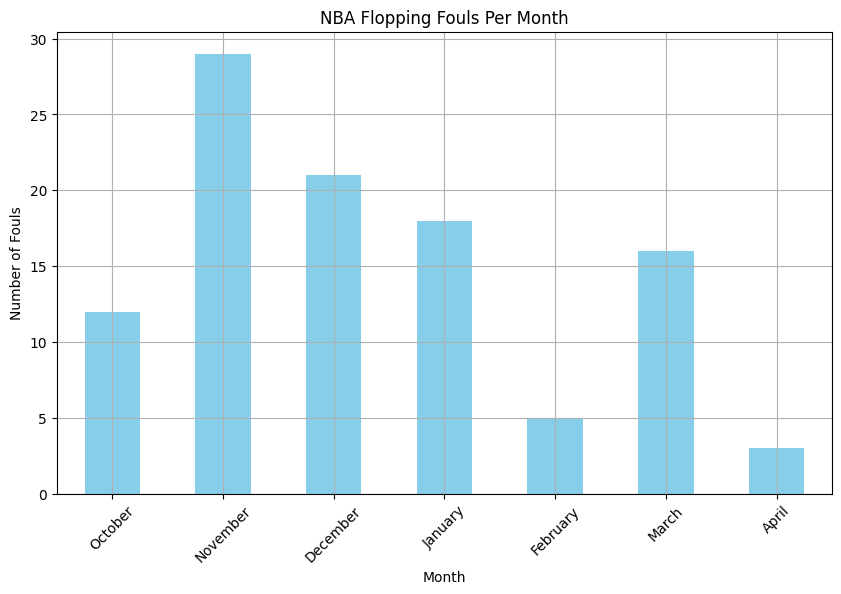

In [26]:
plt.figure(figsize=(10, 6))
monthly_fouls.plot(kind='bar', color='skyblue')
plt.title('NBA Flopping Fouls Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Fouls')
plt.xticks(ticks=range(len(monthly_fouls)), labels=[month_mapping[m] for m in nba_season_months], rotation=45)
plt.grid(True)
plt.show()